In [10]:
import os
from glob import glob

import pairwise_fte
from py_utils import data_ops
import evaluate_fte

%load_ext autoreload
%autoreload 2

%matplotlib inline

# root_dir = os.path.join("..", "data")
# If you are running the code remotely on the Linux i9.
root_dir = os.path.join("/","data", "dlc", "to_analyse", "cheetah_videos")

In [ ]:
# Generate the pose functions if this has not been done before (note this should only be performed once). It will be saved in the root_dir.
functions = pairwise_fte.create_pose_functions(root_dir)

In [11]:
# Configurations for the optimisation. /Users/zico/msc/dev/AcinoSet/data/2017_08_29/top/phantom/flick1_1
data_path = os.path.join("2017_08_29", "top", "phantom", "flick1_1")
start_frame = 1
end_frame = -1
dlc_thresh = 0.5

In [12]:
# Run the optimisation
pairwise_fte.run(root_dir, data_path, start_frame, end_frame, dlc_thresh, out_dir_prefix="/data/zico/CheetahResults/tests")

2021-05-21T17:18:30.984 | INFO | pairwise_fte: Prepare data - Start
2021-05-21T17:18:32.726 | INFO | pairwise_fte: Load H5 2D DLC prediction data
2021-05-21T17:18:33.063 | INFO | pairwise_fte: Estimate the initial trajectory
2021-05-21T17:18:33.424 | INFO | pairwise_fte: Prepare data - End
2021-05-21T17:18:33.429 | INFO | pairwise_fte: Start frame: 0, End frame: 200, Frame rate: 90
2021-05-21T17:18:33.433 | INFO | pairwise_fte: Setup optimisation - Start
2021-05-21T17:18:33.750 | INFO | pairwise_fte: Measurement initialisation...Done
2021-05-21T17:18:36.163 | INFO | pairwise_fte: Variable initialisation...Done
2021-05-21T17:18:59.204 | INFO | pairwise_fte: Constaint initialisation...Done
2021-05-21T17:19:00.171 | INFO | pairwise_fte: Objective initialisation...Done
2021-05-21T17:19:00.176 | INFO | pairwise_fte: Setup optimisation - End
2021-05-21T17:19:00.181 | INFO | pairwise_fte: Initialisation took 29.19s
2021-05-21T17:23:47.592 | INFO | pairwise_fte: Optimisation solver took 287.41

In [ ]:
# Compare the optimisation with previous results i.e. compare the output pickle file fte.pickle. This is a visual inspection.abs
orig_file = os.path.join(root_dir, data_path, "ekf", "ekf.pickle")
pw_file = os.path.join(root_dir, data_path, "fte_pw", "fte.pickle")
pairwise_fte.compare(orig_file, pw_file)

In [ ]:
# DEBUB purposes - if you want to display particular frames to inspect the measurements that are incorporated in the optimisation process.
# The camera to use.
cam_num = 1
# The measurements to display 1 - base prediction, 2 - 3 pairwise measurements. Max is 3.
pw_values = (1, 2, 3)
# Frame number to display.
frame_num = 110
pairwise_fte.display_test_image(data_dir, cam_num, pw_values, frame_num)

/opt/anaconda/envs/pypy/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


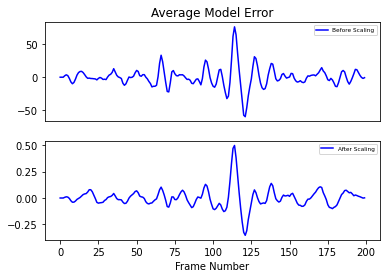

/opt/anaconda/envs/pypy/lib_pypy/_functools.py:80: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  return self._func(*(self._args + fargs), **fkeywords)


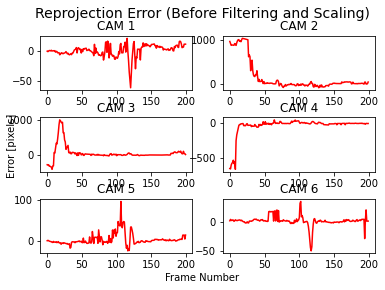

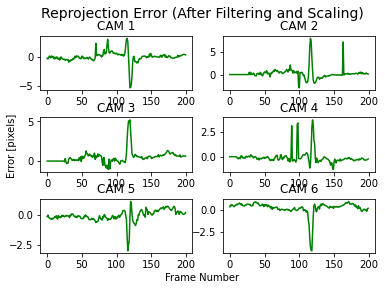

In [13]:
eval_dir = os.path.join("/data/zico/CheetahResults/tests", data_path, "fte_pw")
data = data_ops.load_pickle(os.path.join(eval_dir, "fte.pickle"))
results_dir = os.path.join(eval_dir, "evaluation")
os.makedirs(eval_dir, exist_ok=True)
evaluate_fte.eval_model_error(data, results_dir, True)
evaluate_fte.eval_meas_error(data, results_dir, True)